In [281]:
!curl -O https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0  13.6M      0  0:00:11  0:00:11 --:--:-- 16.7M


In [282]:
!tar xvzf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [0]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def load_cifar10_data(batch_number):
  with open('cifar-10-batches-py/data_batch_'+ str(batch_number), 'rb') as file:
      batch = pickle.load(file, encoding='latin1')

  features = batch['data']
  labels = batch['labels']
  return features, labels

In [0]:
batch_1, labels_1 = load_cifar10_data(1)
batch_2, labels_2 = load_cifar10_data(2)
batch_3, labels_3 = load_cifar10_data(3)
batch_4, labels_4 = load_cifar10_data(4)
batch_5, labels_5 = load_cifar10_data(5)

In [285]:
batch_3

array([[ 26,  17,  13, ...,  27,  26,  27],
       [ 94, 101,  95, ..., 182, 184, 155],
       [183, 158, 166, ..., 250, 250, 250],
       ...,
       [175, 200, 207, ..., 124,  49,  32],
       [ 28,  59,  67, ...,  36,  44,  41],
       [ 62,  40,  61, ..., 127, 124, 116]], dtype=uint8)

In [0]:
import numpy as np

all_images = np.append(batch_1, batch_2, axis=0)
all_images = all_images.reshape((len(all_images), 3, 32, 32)).transpose(0,2,3,1)
all_labels = np.append(labels_1, labels_2, axis=0)

In [0]:
X_train = np.append(batch_1[0:8000], batch_2[0:8000], axis=0)
X_train = np.append(X_train, batch_3[0:8000], axis=0)
X_train = np.append(X_train, batch_4[0:8000], axis=0)
X_train = np.append(X_train, batch_5[0:8000], axis=0)

Y_train = np.append(labels_1[0:8000], labels_2[0:8000], axis=0)
Y_train = np.append(Y_train, labels_3[0:8000], axis=0)
Y_train = np.append(Y_train, labels_4[0:8000], axis=0)
Y_train = np.append(Y_train, labels_5[0:8000], axis=0)

In [0]:
X_validation = np.append(batch_1[8001:9000], batch_2[8001:9000], axis=0)
X_validation = np.append(X_validation, batch_3[8001:9000], axis=0)
X_validation = np.append(X_validation, batch_4[8001:9000], axis=0)
X_validation = np.append(X_validation, batch_5[8001:9000], axis=0)

Y_validation = np.append(labels_1[8001:9000], labels_2[8001:9000], axis=0)
Y_validation = np.append(Y_validation, labels_3[8001:9000], axis=0)
Y_validation = np.append(Y_validation, labels_4[8001:9000], axis=0)
Y_validation = np.append(Y_validation, labels_5[8001:9000], axis=0)

In [0]:
X_test = np.append(batch_1[9001:10000], batch_2[9001:10000], axis=0)
X_test = np.append(X_test, batch_3[9001:10000], axis=0)
X_test = np.append(X_test, batch_4[9001:10000], axis=0)
X_test = np.append(X_test, batch_5[9001:10000], axis=0)

Y_test = np.append(labels_1[9001:10000], labels_2[9001:10000], axis=0)
Y_test = np.append(Y_test, labels_3[9001:10000], axis=0)
Y_test = np.append(Y_test, labels_4[9001:10000], axis=0)
Y_test = np.append(Y_test, labels_5[9001:10000], axis=0)

In [293]:
print("Length of X_train:", len(X_train), "Length of Y_train:", len(Y_train))
print("Length of X_validation:",len(X_validation), "Length of Y_validation:", len(Y_validation))
print("Length of X_test:",len(X_test), "Length of Y_test:", len(Y_test))

Length of X_train: 40000 Length of Y_train: 40000
Length of X_validation: 4995 Length of Y_validation: 4995
Length of X_test: 4995 Length of Y_test: 4995


In [0]:
 %tensorflow_version 1.x
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Activation, \
Flatten, Conv3D, MaxPooling3D
from keras import regularizers
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [0]:
Y_train_one_hot = np_utils.to_categorical(Y_train, 10)
Y_validation_one_hot = np_utils.to_categorical(Y_validation, 10)
Y_test_one_hot = np_utils.to_categorical(Y_test, 10)

X_train = X_train.reshape((len(X_train), 3, 32, 32)).transpose(0,2,3,1)
X_validation = X_validation.reshape((len(X_validation), 3, 32, 32)).transpose(0,2,3,1)
X_test = X_test.reshape((len(X_test), 3, 32, 32)).transpose(0,2,3,1)

In [0]:



#defining parameters

epochs=110
nb_classes=10
conv_1_depth=100
conv_2_depth=100
conv_3_depth=200
conv_4_depth=200
conv_5_depth=400
dense_1_depth=600
dense_2_depth=nb_classes
batch_size=32
learning_rate=0.0001

In [297]:
#defining simple CNN model

model = Sequential()

model.add(Conv2D(conv_1_depth, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(conv_2_depth, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(conv_3_depth, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))

model.add(Conv2D(conv_4_depth, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))

model.add(Conv2D(conv_5_depth, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(dense_1_depth,kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(dense_2_depth))
model.add(Activation('softmax'))

#show model summary

model.summary()

optimizer = Adam(lr=learning_rate)

#compile model 

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=2, width_shift_range=0.15, height_shift_range=0.15, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)

train_set = train_datagen.flow(X_train, Y_train_one_hot, batch_size=32)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_set = validation_datagen.flow(X_validation, Y_validation_one_hot, batch_size=32)

history = model.fit_generator(train_set,
                    steps_per_epoch=600,epochs=epochs,
                    validation_data=(validation_set), validation_steps=300, shuffle=True)



Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 32, 32, 100)       2800      
_________________________________________________________________
activation_92 (Activation)   (None, 32, 32, 100)       0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 100)       90100     
_________________________________________________________________
activation_93 (Activation)   (None, 32, 32, 100)       0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 100)       0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 16, 16, 100)       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 16, 16, 200)     

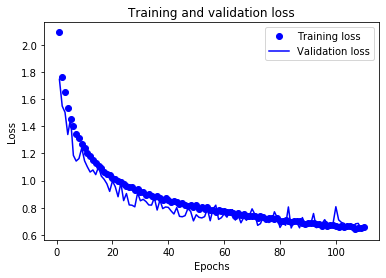

In [298]:
#plot training and validation sets' losses

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [299]:
#evaluate on the test set 
X_test = (X_test)*1./255 
print(model.evaluate(X_test, Y_test_one_hot, batch_size=32))



4995/4995 [==============================] - 1s 168us/step
[0.6736694541719702, 0.8640640640640641]
